# 4. Mushroom foraging

The [mushroom dataset](https://www.kaggle.com/datasets/dhinaharp/mushroom-dataset) contains data about approximately 60000 mushrooms, and your task is to classify them as either edible or poisonous. You can read about the features [here](https://www.kaggle.com/datasets/uciml/mushroom-classification) and import the data using:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
df = pd.read_csv('secondary_data.csv', delimiter = ';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


It's up to you how you approach this data, but at a minimum, your analysis should include:

* Informed **data preparation**.
* 2 different classification models, one of which must be **logistic regression**.
* A discussion of which **performance metric** is most relevant for the evaluation of your models.
* 2 different **validation methodologies** used to tune hyperparameters.
* **Confusion matrices** for your models, and associated comments.

### Informed **data preparation**. +  2 different classification models, one of which must be **logistic regression**.

In [2]:
#Imports
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

#Getting data from the csv
pd.set_option('display.max_columns', 1000)
df = pd.read_csv('secondary_data.csv', delimiter = ';')

#Seed for random so we get the same to relaiblely test.
random_seed = 42

#We use ratioed distrubution because the dataset have a lot of NaN's and that does not go well with the models.
def ratioed_distribution(property_name):
    non_null_values = df[property_name].dropna()
    # Probability distribution
    value_counts = non_null_values.value_counts(normalize=True)  

    nan_count = df[property_name].isna().sum()

    # Generate samples for NaN values while maintaining distribution
    sampled_values = np.random.choice(value_counts.index, size=nan_count, p=value_counts.values)

    df.loc[df[property_name].isna(), property_name] = sampled_values

    new_value_counts = df[property_name].value_counts(normalize=True)

    error_margin = 0.01
    valid = all(abs(new_value_counts - value_counts) <= error_margin)

#For one-hot.
columns_to_encode = [
     "cap-shape", "cap-surface", "cap-color", "gill-attachment",
    "gill-spacing", "gill-color", "stem-root", "stem-surface", "stem-color",
    "veil-type", "veil-color", "ring-type", "spore-print-color", "habitat", "season"
]

#Used to tanform the "p" and "e" to "1" and "0".
le = LabelEncoder()
def encode_columns(columns):
    for column in columns:
        df[column] = le.fit_transform(df[column])
encode_columns(["class"])

#Changes other letter data to 0 and 1.
df["does-bruise-or-bleed"] = df["does-bruise-or-bleed"].replace({ "t": 1, "f": 0 }).astype(int)
df["has-ring"] = df["has-ring"].replace({ "t": 1, "f": 0 }).astype(int)

#Onehot, because else there could be a diffrence numerical value that result in some of the data being ignored.
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

#Isolate lables
X = df_encoded.drop(columns=["class"])
y = df["class"]

#Splitting data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Logistic regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("LOGISTIC REGRESSION")
print(f"Samples: {df.shape[0]}")
print(classification_report(y_test, y_pred_lr))

# Random forest
rf_model = RandomForestClassifier(random_state=random_seed)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("RANDOM FOREST")
print(f"Samples: {df.shape[0]}")
print(classification_report(y_test, y_pred_rf))


C:\Users\jonas\AppData\Local\Temp\ipykernel_26544\3433911708.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["does-bruise-or-bleed"] = df["does-bruise-or-bleed"].replace({ "t": 1, "f": 0 }).astype(int)
C:\Users\jonas\AppData\Local\Temp\ipykernel_26544\3433911708.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["has-ring"] = df["has-ring"].replace({ "t": 1, "f": 0 }).astype(int)


LOGISTIC REGRESSION
Samples: 61069
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5374
           1       0.86      0.85      0.86      6840

    accuracy                           0.84     12214
   macro avg       0.84      0.84      0.84     12214
weighted avg       0.84      0.84      0.84     12214

RANDOM FOREST
Samples: 61069
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



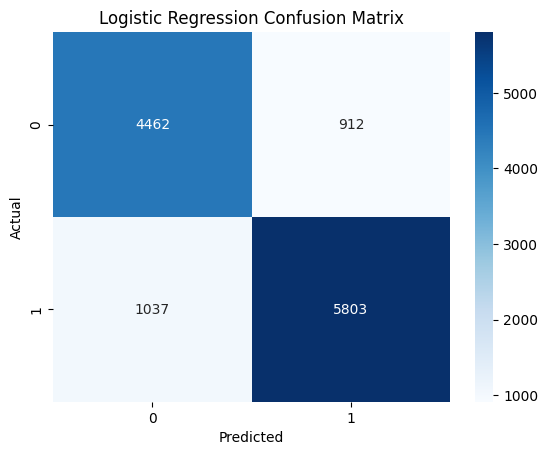

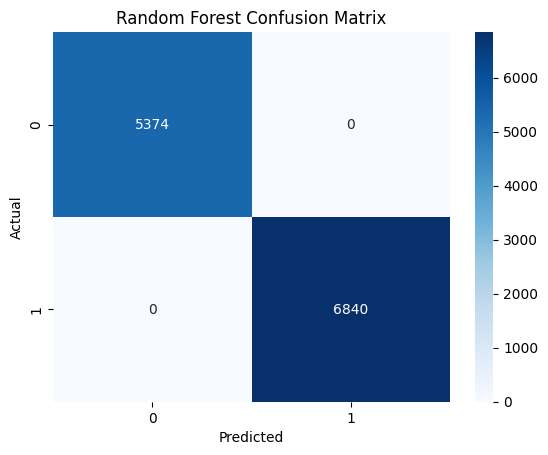

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### A discussion of which **performance metric** is most relevant for the evaluation of your models.

The most relevant of the performance metric in this case would be precision because it evaluates base on the amout of false positivs, and that is important here since this could mean the death of a person.

Racall is less relavant here since it would say a healty mushroom is poisinois and therfor one would not eat it. The consern of ignoring a few healty is better than eating a poisinois one.

The F1 is a balanced evaluation based on the two and therfor also less focused on only the false positives which are the most detimental here.

### 2 different **validation methodologies** used to tune hyperparameters.

In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

#Paramaters for Gridsearch
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [400, 500, 600, 700]
}

# Stratified K-Folds
skf = StratifiedKFold(n_splits=5)

# GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=skf, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#Saves the best modles prediction for confusion matrix
best_lr_model = grid_search.best_estimator_
y_pred_lr2 = best_lr_model.predict(X_test)

#Prints raport of the model after hypertuning with best pramaters
print("Best parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred_lr2))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 0.1, 'max_iter': 600, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5374
           1       0.87      0.85      0.86      6840

    accuracy                           0.84     12214
   macro avg       0.84      0.84      0.84     12214
weighted avg       0.84      0.84      0.84     12214



C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


We use both stratified K-forld and gridsearch to hypertune the logistc regression model.

### **Confusion matrices** for your models, and associated comments.

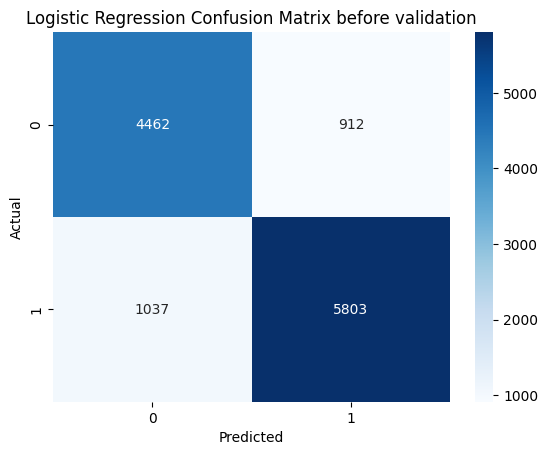

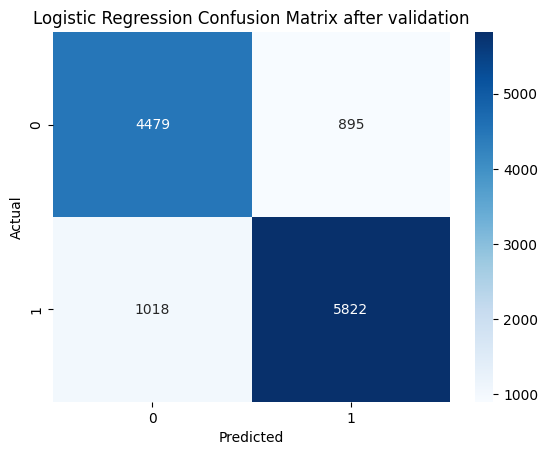

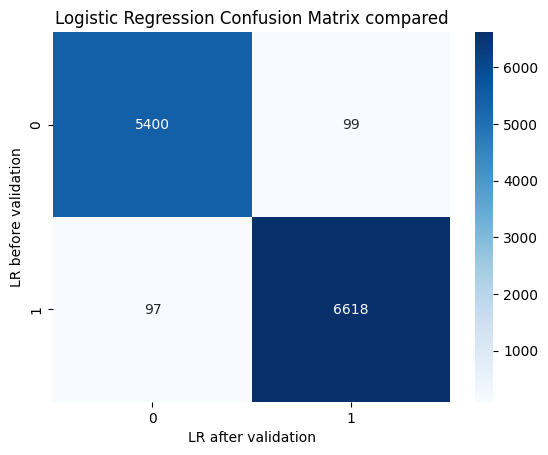

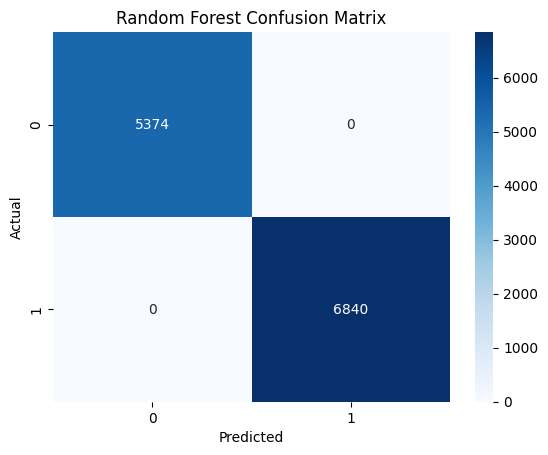

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Logistic confu. matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Logistic Regression Confusion Matrix before validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_lr = confusion_matrix(y_test, y_pred_lr2)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Logistic Regression Confusion Matrix after validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_lr = confusion_matrix(y_pred_lr, y_pred_lr2)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Logistic Regression Confusion Matrix compared")
plt.xlabel("LR after validation")
plt.ylabel("LR before validation")
plt.show()


#Random Forest confu. matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**For logistic regression:**

The tuned model maintained an accuracy of 84%, which is consistent with the performance observed before tuning. This indicates that the model was already well-optimized, and the tuning process helped refine its performance without sacrificing accuracy.
Although precision is less servere it still got improved by 1% going from 86% to 87%
Even though recall remained the same at 83%, the confusion matrix shows a slight improvment in fewer false negatives.

**For random forest:** 

While a 100% accuracy is impressive, it raises concerns about overfitting. The model may have learned the training data too well, including noise and outliers, which can lead to poor generalization on unseen data. It is essential to validate this model on a separate validation set or through cross-validation to ensure it performs well on new data.